### Task name : Prediction Using Decision Tree Algorithm || September 2021
### Perform by : kakunuri venkata harsha vardhan reddy


### Importing Libraries¶


In [1]:
import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-plot
import scikitplot as skplt
import pandas as pd
import seaborn as sns


In [2]:
data = pd.read_csv("D:\Iris.csv")

In [3]:
data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:

data.drop('Id', axis = 1, inplace = True)      
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 5)

In [7]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
data.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [10]:
data.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [11]:
data.max()

SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [12]:
data.min()

SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

### Visualization

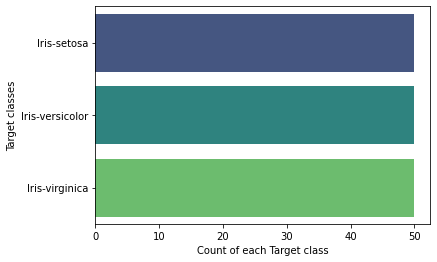

In [13]:
# target Class Count
sns.countplot(y=data.Species ,data=data, palette="viridis")
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

SepalLengthCm       AxesSubplot(0.125,0.657941;0.352273x0.222059)
SepalWidthCm     AxesSubplot(0.547727,0.657941;0.352273x0.222059)
PetalLengthCm       AxesSubplot(0.125,0.391471;0.352273x0.222059)
PetalWidthCm     AxesSubplot(0.547727,0.391471;0.352273x0.222059)
dtype: object

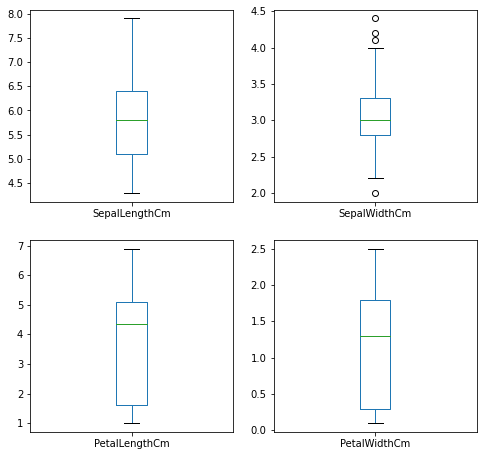

In [14]:
data.plot(kind = 'box', subplots=True, layout = (3,2), figsize = (8,12))

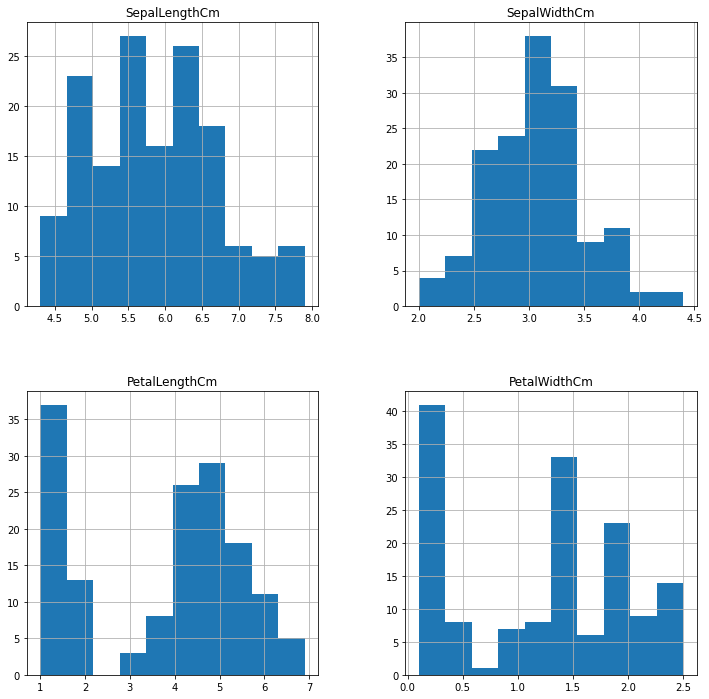

In [15]:
data.hist(figsize=(12,12))
plt.show()

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

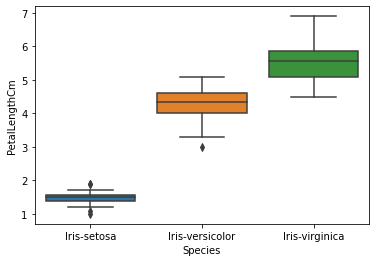

In [16]:
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data=data)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

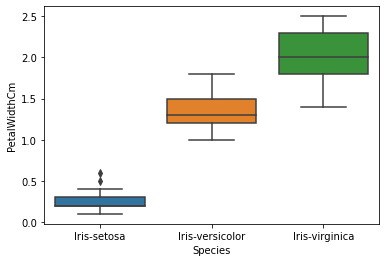

In [17]:
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data=data)

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

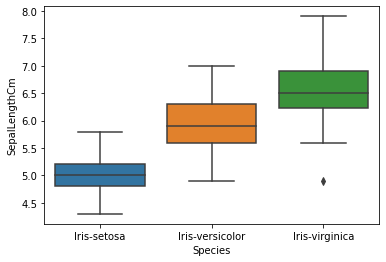

In [18]:
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data=data)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

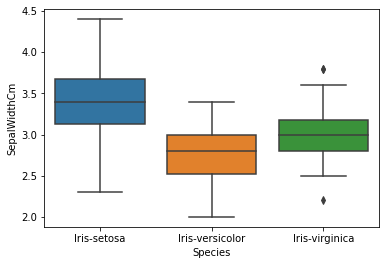

In [19]:
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data=data)

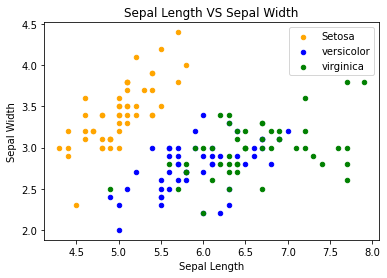

In [20]:
#Sepal Length VS Sepal Width
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Sepal Width")
plt.show()

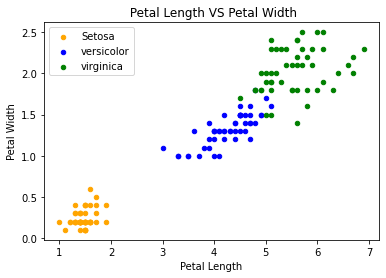

In [21]:
#Petal Length VS Petal Width
fig = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Petal Width")
plt.show()

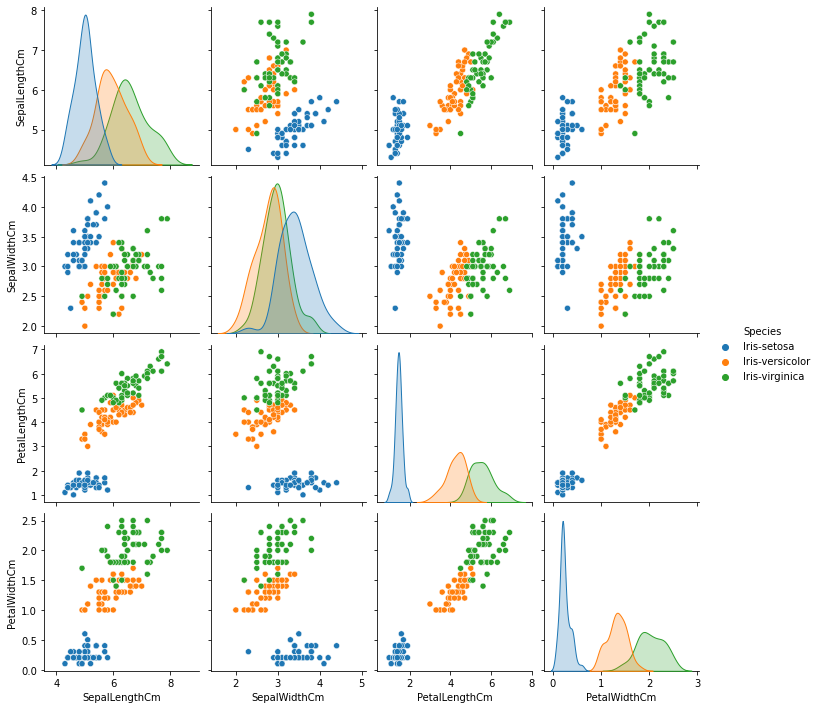

In [22]:
sns.pairplot(data, hue = 'Species')       #A pairwise relationship in data

### Data Preprocessing or Correlation matrix

In [23]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


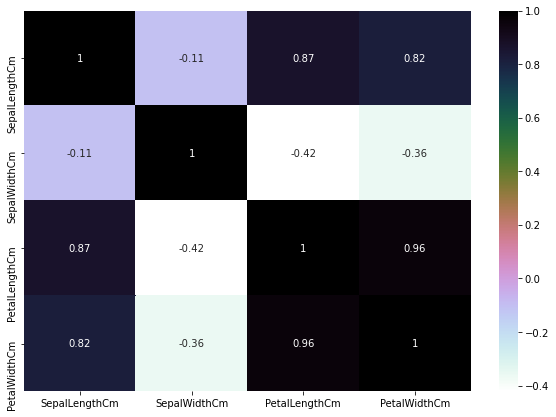

In [24]:
plt.figure(figsize= (10,7))
sns.heatmap(data.corr(), annot=True, cmap = 'cubehelix_r')
plt.show()

### Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
data['Species'] = le.fit_transform(data['Species'])     #returns encoding labels
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
x = data.drop(columns = ['Species'])      #drop the target

In [28]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
y = data['Species']       #target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

### Splitting data into train and test

In [30]:
from sklearn.model_selection import train_test_split
tt = train_test_split
xtrain, xtest, ytrain, ytest = tt(x, y, test_size = 0.3, random_state = 0)

### Selecting Models¶

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

### Training and Evaluating model

In [32]:
models = [lr, knn, svc, gnb, dtc, rfc]
scores = []

for model in models:
  model.fit(xtrain, ytrain)
  ypred = model.predict(xtest)
  scores.append(accuracy_score(ytest, ypred))
  print("Accuracy of " + type(model).__name__+ ' is', accuracy_score(ytest, ypred))

Accuracy of LogisticRegression is 0.9777777777777777
Accuracy of KNeighborsClassifier is 0.9777777777777777
Accuracy of SVC is 0.9777777777777777
Accuracy of GaussianNB is 1.0
Accuracy of DecisionTreeClassifier is 0.9777777777777777
Accuracy of RandomForestClassifier is 0.9777777777777777


### Accuracy by Confusion Matrix¶

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
cm = confusion_matrix(ytest, ypred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot:>

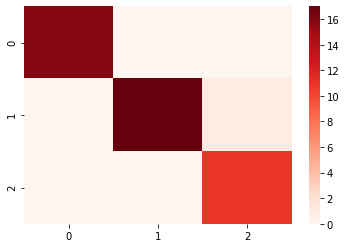

In [35]:
sns.heatmap(cm, cmap = 'Reds')

### Plot Decision Tree

[Text(133.92000000000002, 195.696, 'X[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(66.96000000000001, 108.72, 'X[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(234.36, 65.232, 'X[1] <= 2.75\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267

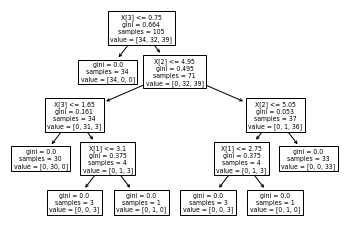

In [36]:
from sklearn import tree
tree.plot_tree(dtc)

In [37]:
!pip install pydotplus

In [38]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [39]:
Species_tree=DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [40]:
Species_tree.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [41]:
prediction=Species_tree.predict(xtest)

In [42]:
print(prediction[0:5])
print(ytest[0:5])

[2 1 0 2 0]
114    2
62     1
33     0
107    2
7      0
Name: Species, dtype: int32


In [43]:
!pip install graphviz
from graphviz import Digraph
import pydotplus


In [44]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


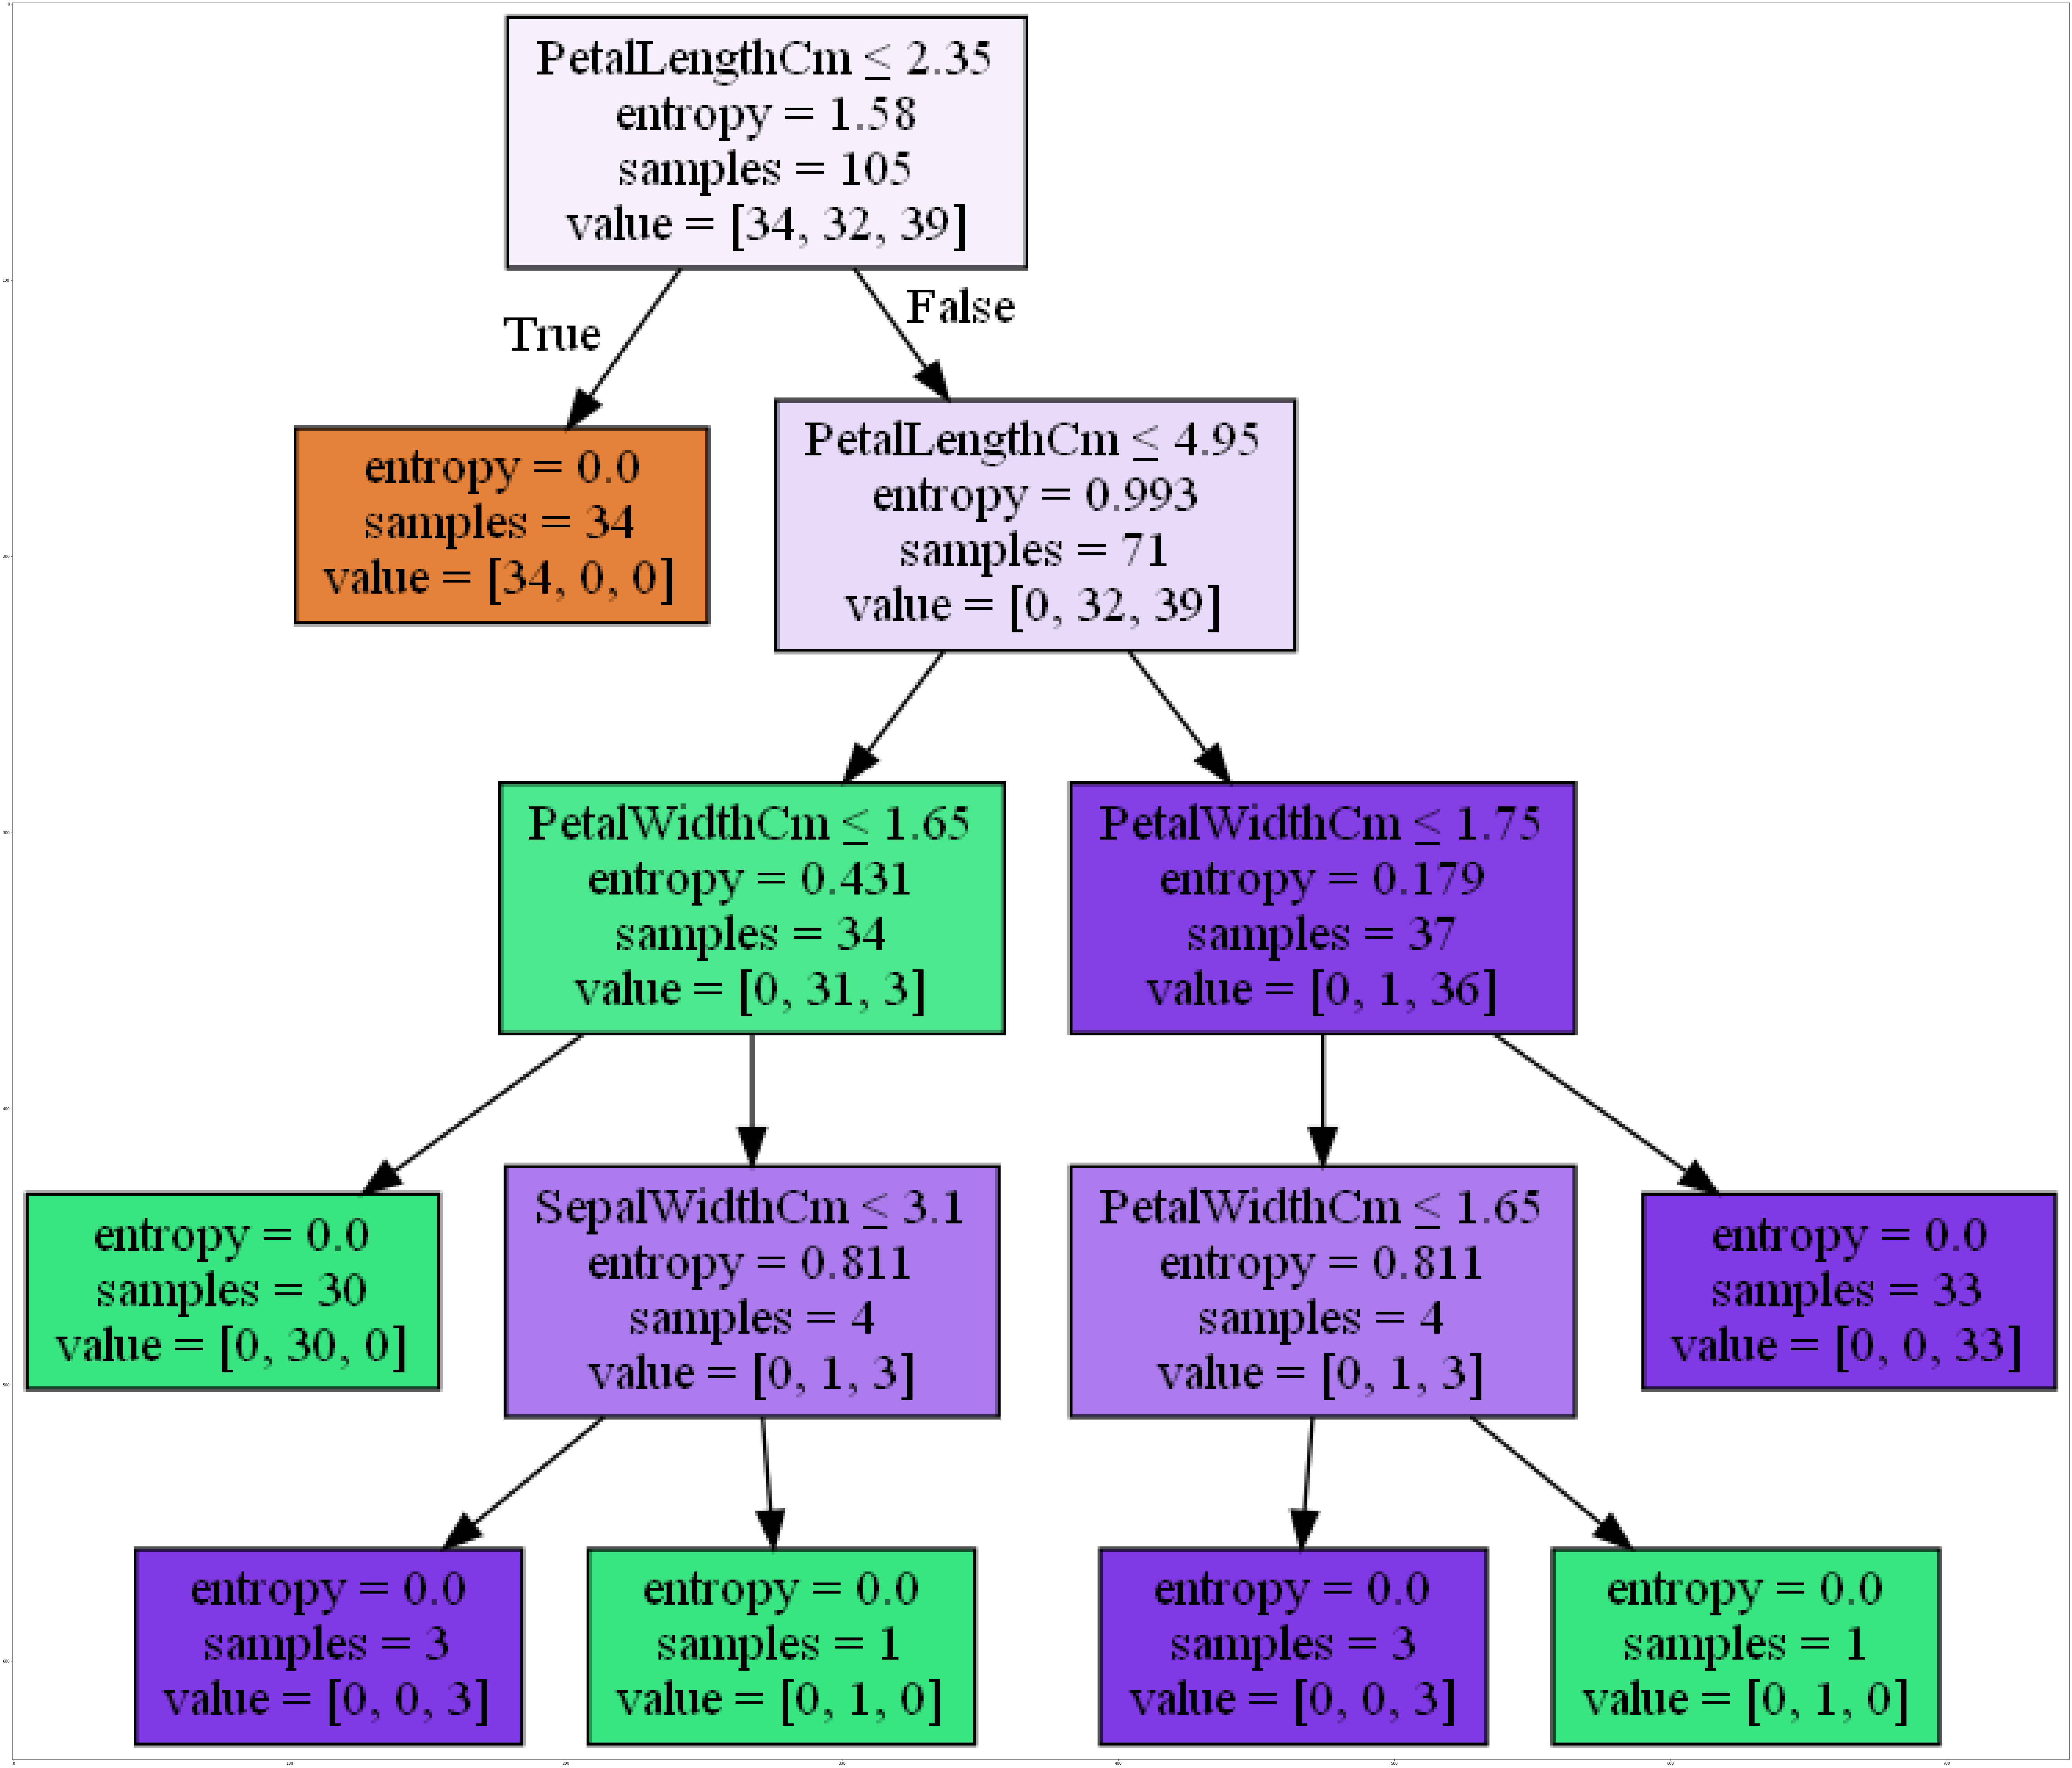

In [45]:
#Printing the Decision Tree
dot_data = StringIO()
filename = "Speciestree.png"
featureNames = data.columns[0:4]
targetNames = data["Species"].unique().tolist()
out=tree.export_graphviz(Species_tree,feature_names=featureNames, out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

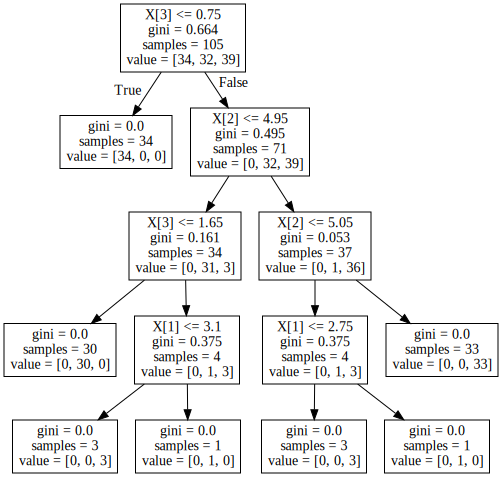

In [46]:
import graphviz

dot_data = tree.export_graphviz(dtc, out_file = None)

graph = graphviz.Source(dot_data)
graph